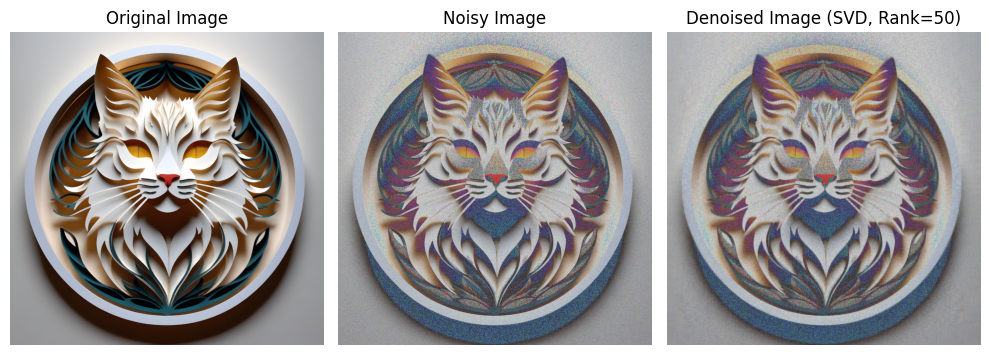

In [7]:
import numpy as np
import matplotlib
import os
import matplotlib.pyplot as plt
from PIL import Image

def image_to_matrix(image_path):
    img = Image.open(image_path)
    img_array = np.array(img)
    return img_array

def matrix_to_image(matrix, output_path):
    img = Image.fromarray(matrix)
    img.save(output_path)

def add_noise(image_array, noise_std=30):
    noise = np.random.normal(scale=noise_std, size=image_array.shape).astype(np.uint8)
    noisy_image = np.clip(image_array + noise, 0, 255).astype(np.uint8)
    return noisy_image

def denoise_image_svd(image_array, rank=None):
    # Apply SVD separately to each channel
    denoised_channels = []
    for channel in range(image_array.shape[2]):  # Iterate over channels (e.g., R, G, B)
        U, S, Vt = np.linalg.svd(image_array[:, :, channel], full_matrices=False)
        
        # Apply rank approximation
        if rank is not None:
            U = U[:, :rank]
            S = np.diag(S[:rank])
            Vt = Vt[:rank, :]
        
        denoised_channel = np.dot(U, np.dot(S, Vt))
        denoised_channel = np.clip(denoised_channel, 0, 255).astype(np.uint8)
        denoised_channels.append(denoised_channel)
    
    # Combine denoised channels into an RGB image
    denoised_image = np.stack(denoised_channels, axis=2)
    return denoised_image

# Example usage
if __name__ == '__main__':
    # Load an example image
    image_path = 'cat.png'
    original_image = image_to_matrix(image_path)
    
    # Add Gaussian noise to the image
    noisy_image = add_noise(original_image, noise_std=30)
    
    # Denoise the noisy image using SVD
    denoised_image = denoise_image_svd(noisy_image, rank=350)
    
    # Display and save results
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(noisy_image)
    plt.title('Noisy Image')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(denoised_image)
    plt.title('Denoised Image (SVD, Rank=50)')
    plt.axis('off')
    
    plt.tight_layout()
    plt.savefig(os.path.join("../output", "denoise.jpg"))
    # matplotlib.rcParams.update({
    #     "pgf.texsystem": "xelatex",
    #     'text.usetex': True,
    #     'pgf.rcfonts': False,
    #     "font.family": "mononoki Nerd Font Mono",
    #     "font.serif": [],
    #     #  "font.cursive": ["mononoki Nerd Font", "mononoki Nerd Font Mono"],
    # })
    # plt.savefig(os.path.join("../output", "image-comp-psnr-log.pgf"))
    plt.show()
